**Download dataset directly from Kaggle's API**

In [150]:
#install kaggle library
!pip install kaggle

#upload kaggle.json file
from google.colab import files
files.upload()

#set path
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/ 
!chmod 600 ~/.kaggle/kaggle.json

#download dataset(Zip file)
!kaggle datasets download -d freecodecamp/all-posts-public-main-chatroom

#extract zip file
from zipfile import ZipFile
file_name="all-posts-public-main-chatroom.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')
  



Saving kaggle.json to kaggle (1).json
all-posts-public-main-chatroom.zip: Skipping, found more recently modified local copy (use --force to force download)
Done


**Import relevent libraries and packages**

In [97]:
import pandas as pd
import numpy as np

import re
import nltk
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Read only top 20 rows of Dataset**

In [0]:
a=pd.read_csv(r'freecodecamp_casual_chatroom.csv',nrows=20)

In [99]:
a.head()

,Unnamed: 0,editedAt,fromUser,fromUser.avatarUrl,fromUser.avatarUrlMedium,fromUser.avatarUrlSmall,fromUser.displayName,fromUser.gv,fromUser.id,fromUser.removed,...,issues,mentions,meta,readBy,sent,status,text,unread,urls,v
0,0,NaN,NaN,NaN,https://avatars2.githubusercontent.com/u/21996...,https://avatars2.githubusercontent.com/u/21996...,Charles Watson,3.0,546fd99cdb8155e6700d6ec8,NaN,...,[],[],[],22,2014-12-31T23:01:35.647Z,NaN,no legumes either,False,[],1
1,1,NaN,NaN,NaN,https://avatars0.githubusercontent.com/u/10361...,https://avatars0.githubusercontent.com/u/10361...,janetwalters008,NaN,54a47e0cdb8155e6700e486e,NaN,...,[],[],[],21,2014-12-31T23:02:51.600Z,NaN,That bullet proof coffee sounds insane.,False,[],1
2,2,NaN,NaN,NaN,https://avatars0.githubusercontent.com/u/10361...,https://avatars0.githubusercontent.com/u/10361...,janetwalters008,NaN,54a47e0cdb8155e6700e486e,NaN,...,[],[],[],21,2014-12-31T23:03:14.221Z,NaN,That guy has huge eyes.,False,[],1
3,3,NaN,NaN,NaN,https://avatars2.githubusercontent.com/u/21996...,https://avatars2.githubusercontent.com/u/21996...,Charles Watson,3.0,546fd99cdb8155e6700d6ec8,NaN,...,[],"[{'userIds': [], 'userId': '54a47e0cdb8155e670...",[],22,2014-12-31T23:03:20.182Z,NaN,@janetwalters008 It is. but it works. some peo...,False,[],1
4,4,NaN,NaN,NaN,https://avatars0.githubusercontent.com/u/42194...,https://avatars0.githubusercontent.com/u/42194...,Paul Gilliam,3.0,54a44bbbdb8155e6700e47de,NaN,...,[],[],[],22,2014-12-31T23:03:38.388Z,NaN,They guy that came up with the idea is kind of...,False,[],1


In [100]:
a.columns

Index(['Unnamed: 0', 'editedAt', 'fromUser', 'fromUser.avatarUrl',
       'fromUser.avatarUrlMedium', 'fromUser.avatarUrlSmall',
       'fromUser.displayName', 'fromUser.gv', 'fromUser.id',
       'fromUser.removed', 'fromUser.staff', 'fromUser.url',
       'fromUser.username', 'fromUser.v', 'html', 'id', 'issues', 'mentions',
       'meta', 'readBy', 'sent', 'status', 'text', 'unread', 'urls', 'v'],
      dtype='object')

**Import relevent columns related to this problem**

In [0]:
b=pd.read_csv(r'freecodecamp_casual_chatroom.csv',usecols=['fromUser.id','text'])

In [0]:
#drop duplicate entries
a1=b.drop_duplicates()

In [103]:
a1.head()

,fromUser.id,text
0,546fd99cdb8155e6700d6ec8,no legumes either
1,54a47e0cdb8155e6700e486e,That bullet proof coffee sounds insane.
2,54a47e0cdb8155e6700e486e,That guy has huge eyes.
3,546fd99cdb8155e6700d6ec8,@janetwalters008 It is. but it works. some peo...
4,54a44bbbdb8155e6700e47de,They guy that came up with the idea is kind of...


**Top 5 Users**

In [104]:
a1['fromUser.id'].value_counts().head(5)

55b977f00fc9f982beab7883    338428
56bc36fbe610378809c0e1a5    127582
55a7c9e08a7b72f55c3f991e    120279
5755d15ac43b8c6019782e51     86947
55a098fd5e0d51bd787afe94     77487
Name: fromUser.id, dtype: int64

In [105]:
a1['text'][a1['fromUser.id']=='5755d15ac43b8c6019782e51'].head(10)

2484077    @kmoreno08 I like The Social Network soundtrac...
2484100    @combsco I'm not noticing much differences bet...
2484118    Btw @Tmunk it might've sent you to that line b...
2484370    https://developer.mozilla.org/en-US/ is a grea...
2486202    future development of those languages relies o...
2487145    the version of node in apt is older than the c...
2487166                   className="{prop.key}" @arshdkhn1 
2487168       I might be wrong but i'm pretty sure that's it
2487172                                                 yeah
2487173                                            should be
Name: text, dtype: object

In [106]:
#drop this userid because it's a bot(we can check by reading more messages of this userId)
b1=a1.drop(a1.index[a1['fromUser.id']=='55b977f00fc9f982beab7883'],axis=0)
b1.shape

(4288434, 2)

**create 3 different datasets containing top three user's messages(except bot)**

In [0]:
c1=b1[b1['fromUser.id']=='56bc36fbe610378809c0e1a5'].reset_index(drop=True)
c2=b1[b1['fromUser.id']=='55a7c9e08a7b72f55c3f991e'].reset_index(drop=True)
c3=b1[b1['fromUser.id']=='5755d15ac43b8c6019782e51'].reset_index(drop=True)

In [0]:
#check and fill null values with space
c1['text']=c1['text'].fillna('')
c2['text']=c2['text'].fillna('')
c3['text']=c3['text'].fillna('')

In [0]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
from wordcloud import WordCloud

**1.)Pre-process these datasets by removing punctuations,special charachtar and stopwords** 

**2.)Visualize words by WordCloud**

**3.)Visualize most commen words and their counts**

In [0]:
#pre-processing of user's messages

chat=[]
list1=['#','@','$']


for i in range(0,120279):
    Re=' '.join(word for word in c2['text'][i].split() if word[0] not in list1) 
    Re=re.sub('[^a-zA-Z]',' ',Re)
    Re=Re.lower()
    Re=Re.split()
    Re=[ps.stem(word) for word in Re if not word in set(stopwords.words('english'))]
    Pe=[]
    for word in Re:
        if len(word)>2:
            Pe.append(word)
    Pe=' '.join(Pe)
    
    chat.append(Pe)

all_words=' '.join(chat)    

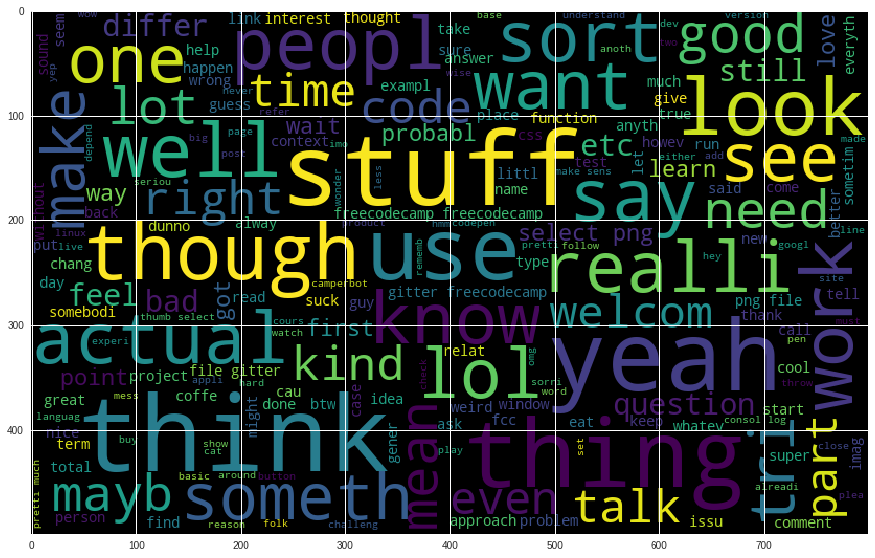

In [111]:
#word-cloud

wc1=WordCloud(width=800,height=500,random_state=21,max_font_size=100,min_font_size=3).generate(all_words)
plt.figure(figsize=(15,10))
plt.imshow(wc1)

In [0]:
freq=nltk.FreqDist(all_words.split())

A=pd.DataFrame({'texts': list(freq.keys()),'count':list(freq.values())})
A=A.nlargest(columns='count',n=10000)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


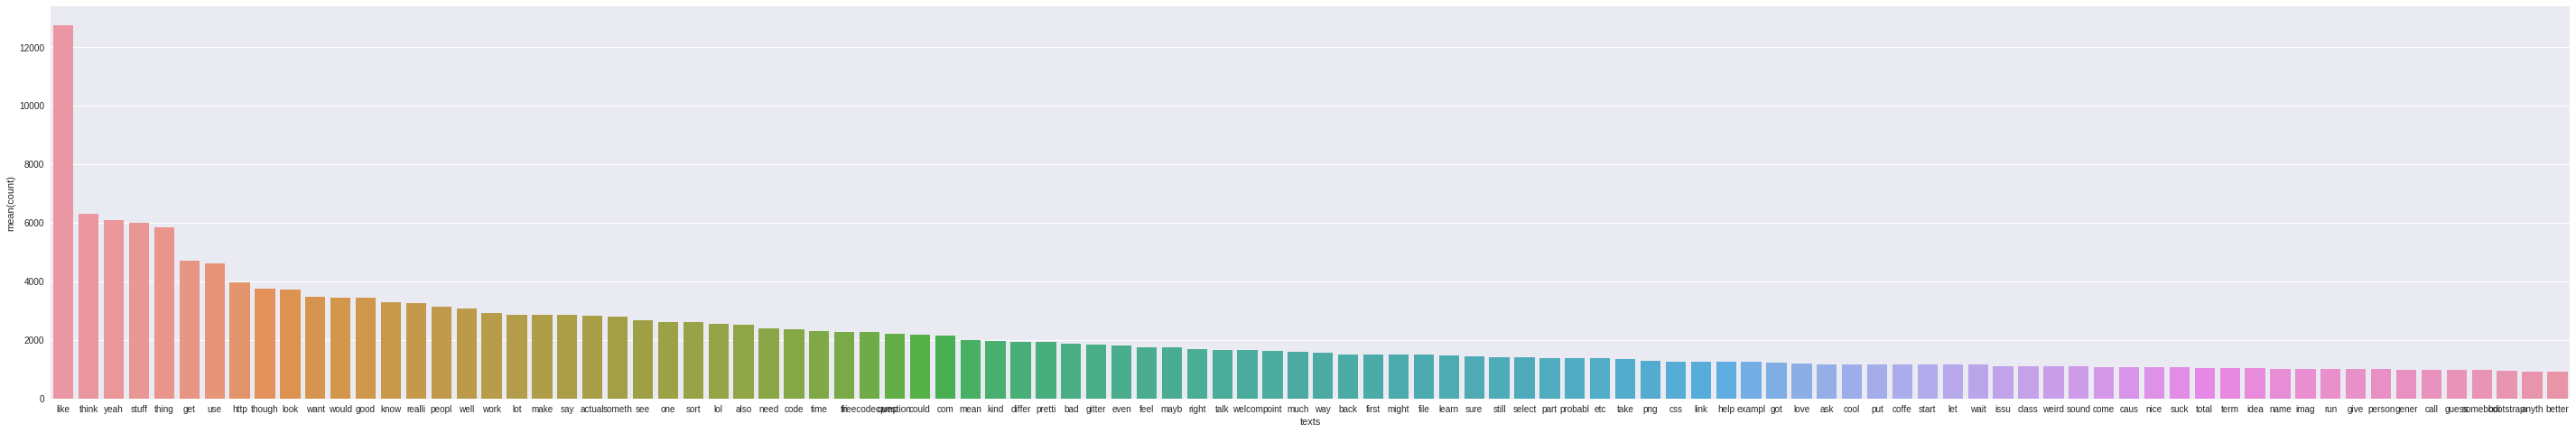

In [113]:
plt.figure(figsize=(50,8))
sns.barplot(A['texts'][:100],A['count'][:100])

In [114]:
A[A['texts']=='js']

,count,texts


In [0]:
#pre-processing of other user's message

chat1=[]


for i in range(0,127582):
    Re=' '.join(word for word in c1['text'][i].split() if word[0] not in list1)
    Re=re.sub('[^a-zA-Z]',' ',Re)
    Re=Re.lower()
    Re=Re.split()
    Re=[ps.stem(word) for word in Re if not word in set(stopwords.words('english'))]
    Pe=[]
    for word in Re:
        if len(word)>1:
            Pe.append(word)
    Pe=' '.join(Pe)
    
    chat1.append(Pe)

all_words_1=' '.join(chat1)    

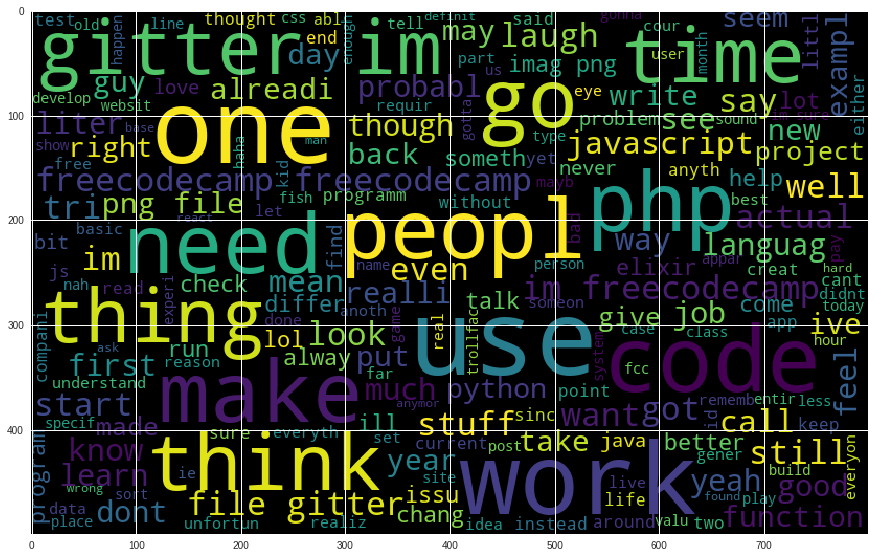

In [116]:
wc2=WordCloud(width=800,height=500,random_state=21,max_font_size=100,min_font_size=3).generate(all_words_1)
plt.figure(figsize=(15,10))
plt.imshow(wc2)

In [0]:
freq_1=nltk.FreqDist(all_words_1.split())

B=pd.DataFrame({'texts': list(freq_1.keys()),'count':list(freq_1.values())})
B=B.nlargest(columns='count',n=10000)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


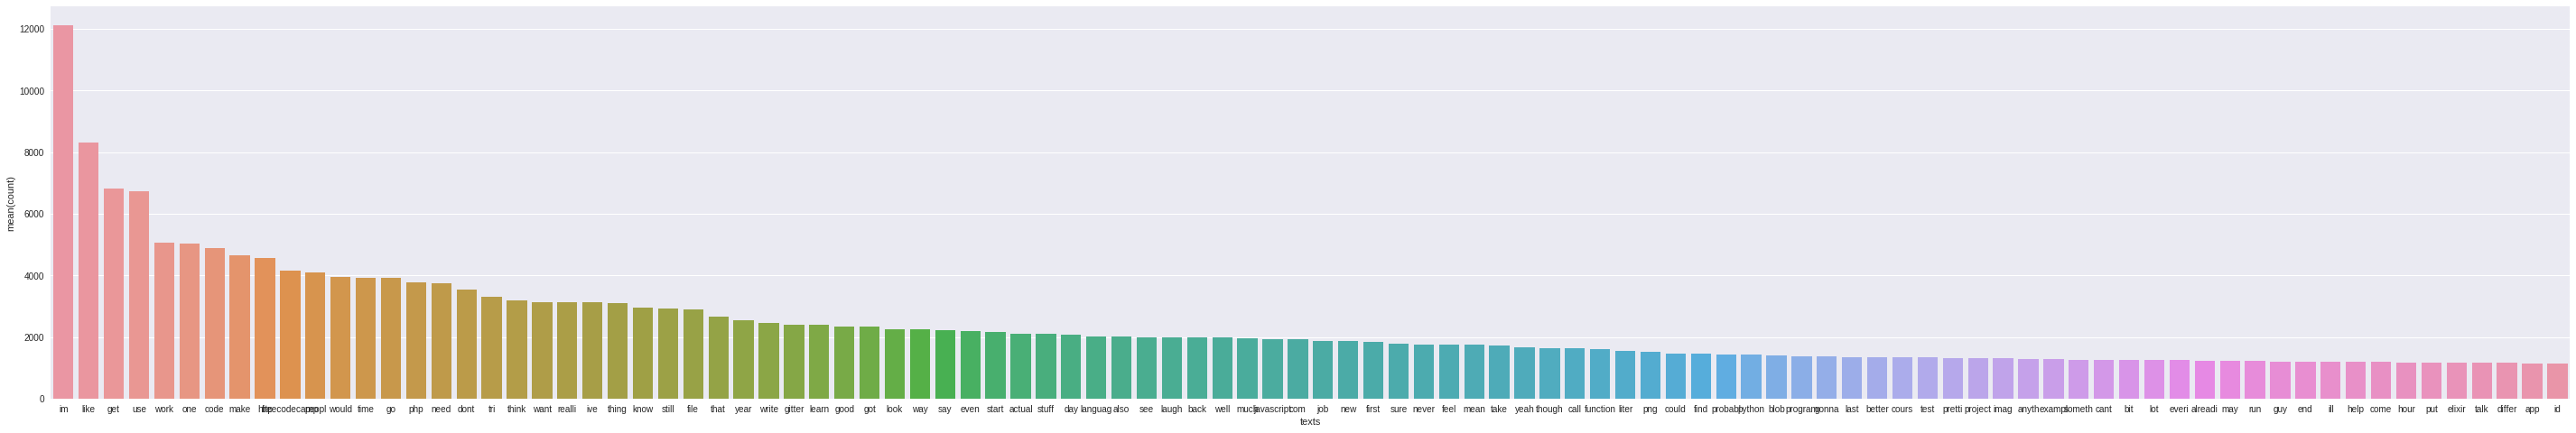

In [118]:
plt.figure(figsize=(50,8))
sns.barplot(B['texts'][:100],B['count'][:100])

In [119]:
B[B['texts']=='python']

,count,texts
187,1421,python


In [0]:
#pre-processing of other user's message

chat2=[]


for i in range(0,86947):
    Re=' '.join(word for word in c3['text'][i].split() if word[0] not in list1) 
    Re=re.sub('[^a-zA-Z]',' ',Re)
    Re=Re.lower()
    Re=Re.split()
    Re=[ps.stem(word) for word in Re if not word in set(stopwords.words('english'))]
    Pe=[]
    for word in Re:
        if len(word)>1:
            Pe.append(word)
    Pe=' '.join(Pe)
    
    chat2.append(Pe)

all_words_2=' '.join(chat2)    

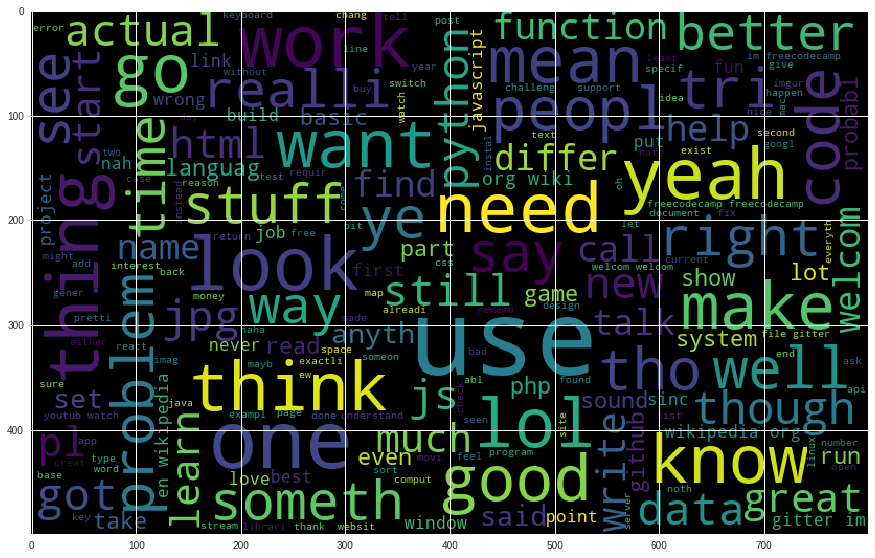

In [121]:
wc3=WordCloud(width=800,height=500,random_state=21,max_font_size=100,min_font_size=3).generate(all_words_2)
plt.figure(figsize=(15,10))
plt.imshow(wc3)

In [0]:
freq_2=nltk.FreqDist(all_words_2.split())

C=pd.DataFrame({'texts': list(freq_2.keys()),'count':list(freq_2.values())})
C=C.nlargest(columns='count',n=10000)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


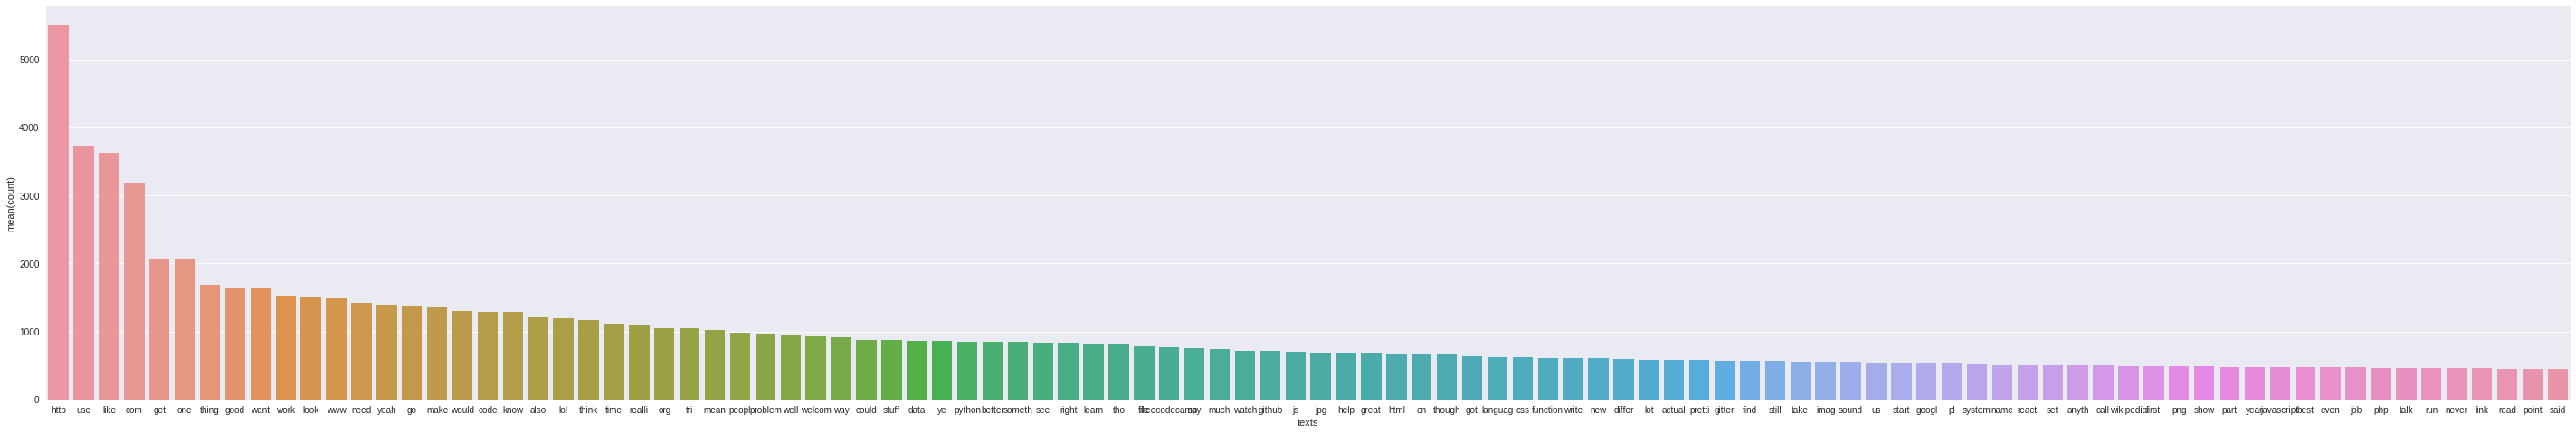

In [123]:
plt.figure(figsize=(50,8))
sns.barplot(C['texts'][:100],C['count'][:100])

In [124]:
C[C['texts']=='py']

,count,texts
3316,75,py


**Create  dataframes by using chat1 and chat2**(only two user's messages are taken in consideration due to other one's messages are not related to any computer language)

In [0]:
data_1=pd.DataFrame(np.array(chat1),columns=['pr_text'])
data_2=pd.DataFrame(np.array(chat2),columns=['pr_text'])

In [126]:
print(data_1.shape)
print(data_2.shape)

(127582, 1)
(86947, 1)


**Small Dictionary for the Java and the Python computer language**

In [0]:
java=['javascript','jpg','imag','png','css','js','html','script','elif','println','android','app','throw','node','length']
python=['python','py','csv','indexerror','valueerror','typeerror','lambda','print','sklearn','dict','pypi','len']

**1.)Extract only those messages from above two dataframes which are containing this dictionary's keywords **



In [0]:
Bool1_1=[]

for i in range(0,127582):
    Bool1_1.append(bool(set(java).intersection(set(data_1['pr_text'][i].split()))))
    
data_1_1=data_1[Bool1_1]

In [0]:
Bool1_2=[]

for i in range(0,127582):
    Bool1_2.append(bool(set(python).intersection(set(data_1['pr_text'][i].split()))))
    
data_1_2=data_1[Bool1_2]

In [0]:
Bool2_1=[]

for i in range(0,86947):
    Bool2_1.append(bool(set(java).intersection(set(data_2['pr_text'][i].split()))))
    
data_2_1=data_2[Bool2_1]

In [0]:
Bool2_2=[]

for i in range(0,86947):
    Bool2_2.append(bool(set(python).intersection(set(data_2['pr_text'][i].split()))))
    
data_2_2=data_2[Bool2_2]

In [132]:
d_java=pd.concat([data_1_1,data_2_1],axis=0,ignore_index=True)
d_python=pd.concat([data_1_2,data_2_2],axis=0,ignore_index=True)
print(d_python.shape)
print(d_java.shape)

(2667, 1)
(11919, 1)


**2.)Create two dataframes again having label '1==java' and '0==python'**



In [0]:
d_java['label']=np.repeat([1],11919)
d_python['label']=np.repeat([0],2667)

In [134]:
data=pd.concat([d_java,d_python],axis=0,ignore_index=True)
data.shape

(14586, 2)

In [0]:
from numpy import random

In [136]:
#shuffle rows of dataset randomly

data['random']=random.rand(14586)
dataset=data.sort_values('random')
dataset.shape

(14586, 3)

**Apply Machine Learning Algorithms**

In [0]:
s_list=dataset['pr_text'].tolist()

In [138]:
s_list

['mostli full featur wyiwyg editor byte tear could almost pass real javascript',
 'throw away pour beer grass right better',
 'http nsa gov info dni prism slide prism collect detail jpg',
 'alert individu pageview throw alert everi singl crawler hit page',
 'http www documentcloud org document nsa report russia spearphish html',
 'blob http file gitter im freecodecamp freecodecamp cbj thumb blob png http file gitter im freecodecamp freecodecamp cbj blob',
 'oh problem throw awayyyyyyyyy',
 'im think im gonna genom python',
 'blob http file gitter im freecodecamp freecodecamp pz thumb blob png http file gitter im freecodecamp freecodecamp pz blob',
 'app',
 'rest order slain jealou javascript',
 'good good give anger thumb jpg http file gitter im freecodecamp freecodecamp kkpk thumb good good give anger thumb jpg http file gitter im freecodecamp freecodecamp kkpk good good give anger thumb jpg',
 'im start python interpret pascal day',
 'appli job php javascript python rubi suspect im o

In [0]:
#import necessary models and libraries

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from xgboost import XGBClassifier


In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV



In [0]:
rfc=RandomForestClassifier(n_estimators=50)
tfidf=TfidfVectorizer()
cv=CountVectorizer()
xgb=XGBClassifier()

In [142]:
#split the dataset into training and testing set, apply RandomForest Classifier on training set, check accuracy on prediction, use Count-Vectorizer model

x=cv.fit_transform(s_list)
y=dataset['label']

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=15,test_size=.20)

rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

cm=confusion_matrix(y_test,y_pred)
print(f1_score(y_test,y_pred))
print(cm)

0.9750993931784893
[[ 469   67]
 [  52 2330]]


In [143]:
#10-fold CrossValidation 

cvs=cross_val_score(estimator=rfc,X=x,y=y,cv=10,scoring='f1')
cvs.mean()

0.9743029102222465

In [144]:
#split the dataset into training and testing set, apply XGBoost Classifier on training set, check accuracy on prediction, use Count-Vectorizer model


x=cv.fit_transform(s_list)
y=dataset['label']

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=.20)

xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)

cm=confusion_matrix(y_test,y_pred)
print(f1_score(y_test,y_pred))
print(cm)

0.9872090585028308
[[ 503   19]
 [  42 2354]]


In [145]:
#10-fold CrossValidation

cvs=cross_val_score(estimator=xgb,X=x,y=y,cv=10,scoring='f1')
cvs.mean()

0.983971827764746

In [146]:
##split the dataset into training and testing set, apply RandomForest Classifier on training set, check accuracy on prediction, use Tfidf-Vectorizer model



x1=tfidf.fit_transform(s_list)
y1=dataset['label']

x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,random_state=7,test_size=.20)

rfc.fit(x1_train,y1_train)
y1_pred=rfc.predict(x1_test)

cm=confusion_matrix(y1_test,y1_pred)
print(f1_score(y1_test,y1_pred))
print(cm)

0.9771119434040783
[[ 460   58]
 [  52 2348]]


In [147]:
#10-fold CrossValidation


cvs=cross_val_score(estimator=rfc,X=x1,y=y1,cv=10,scoring='f1')
cvs.mean()

0.9743482795303071

In [148]:
##split the dataset into training and testing set, apply XGBoost Classifier on training set, check accuracy on prediction, use Tfidf-Vectorizer model

x1=tfidf.fit_transform(s_list)
y1=dataset['label']

x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,random_state=15,test_size=.20)

xgb.fit(x1_train,y1_train)
y1_pred=xgb.predict(x1_test)

cm=confusion_matrix(y1_test,y1_pred)
print(f1_score(y1_test,y1_pred))
print(cm)

0.9826784959864808
[[ 510   26]
 [  56 2326]]


In [149]:
#10-fold CrossValidation


cvs=cross_val_score(estimator=xgb,X=x1,y=y1,cv=10,scoring='f1')
cvs.mean()

0.9828395303492427